<a href="https://colab.research.google.com/github/royarkaofficial/DataOps-Homework-20th-March-2025/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Handling Missing Data in a Retail Dataset
Objective:

a) You are provided with a dataset containing sales data for a retail chain.

b) However, the dataset has missing values in columns such as Sales, Discount, and Customer Age. Your task is to:
Identify the missing values in the dataset.
Analyze the percentage of missing data in each column.

c) Apply appropriate techniques to handle missing values (e.g., mean/median imputation for numerical data and mode imputation for categorical data).

d) Justify your choice of techniques and assess their impact on the dataset.
Dataset:  https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [ ]:
# Calculate percentage of missing data
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64


In [ ]:
# Sample DataFrame with missing values
data = {
    'Age': [25, np.nan, 30, 45, np.nan, 35],
    'Purchase Amount (USD)': [100.5, 200.0, np.nan, 150.0, 175.0, np.nan],
    'Previous Purchases': [5, np.nan, 10, 15, np.nan, 8]
}
df = pd.DataFrame(data)
# Mean imputation
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean())
df['Previous Purchases'] = df['Previous Purchases'].fillna(df['Previous Purchases'].mean())
# Print updated DataFrame
print(df)

     Age  Purchase Amount (USD)  Previous Purchases
0  25.00                100.500                 5.0
1  33.75                200.000                 9.5
2  30.00                156.375                10.0
3  45.00                150.000                15.0
4  33.75                175.000                 9.5
5  35.00                156.375                 8.0


In [ ]:
if 'Category' in df.columns:
    mode_value = df['Category'].mode(dropna=True)
    if not mode_value.empty:
        df['Category'].fillna(mode_value[0], inplace=True)
    else:
        print("Category column has no mode (all values are missing). Filling with 'Unknown'.")
        df['Category'].fillna('Unknown', inplace=True)
else:
    print("Category column not found in the DataFrame.")

Category column not found in the DataFrame.


2. Removing Outliers from a Real Estate Dataset
Objective:

A real estate dataset contains information on property prices, sizes, and ages.

However, some data points are extreme outliers that can skew the analysis.
Your task is to:

1) Identify outliers in numerical columns such as Price, Size (sq. ft.), and Age.

2) Use visualization tools (e.g., box plots or scatter plots) to detect these outliers.

3) Apply techniques like IQR (Interquartile Range) or Z-score to remove or adjust the outliers.

4) Evaluate the dataset before and after outlier removal.

Dataset:  https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

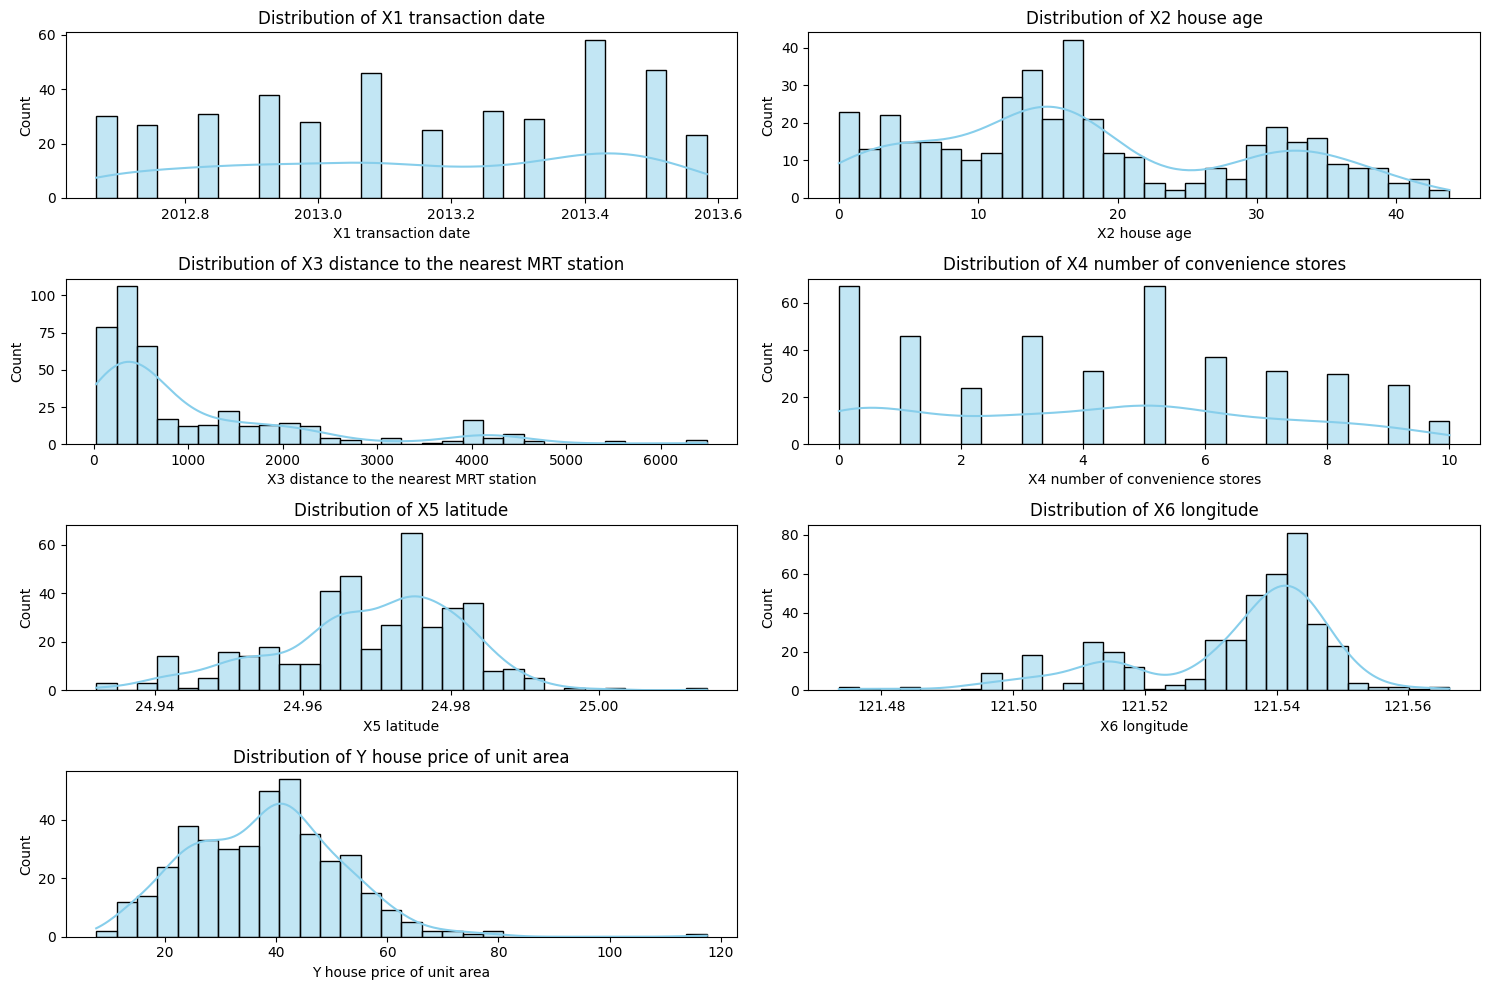

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/Real estate.csv')

# Display summary statistics
print(df.describe())

# Visualization using histograms and KDE plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')  # Histogram with KDE
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the IQR method to remove outliers
for column in ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']:
    df = remove_outliers_iqr(df, column)
    print(df)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']].apply(zscore)

# Define a threshold for Z-scores
threshold = 3

# Filter out rows where Z-scores are above the threshold
df = df[(np.abs(z_scores) < threshold).all(axis=1)]
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# Summary statistics before and after outlier removal
print("Summary Statistics After Outlier Removal:")
print(df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']].describe())

Summary Statistics After Outlier Removal:
       X1 transaction date  X2 house age  \
count           298.000000    298.000000   
mean           2013.137886     18.080537   
std               0.276873     12.156586   
min            2012.667000      0.000000   
25%            2012.917000      8.150000   
50%            2013.167000     15.900000   
75%            2013.417000     30.275000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              298.000000   
mean                               471.205392   
std                                345.824250   
min                                 23.382840   
25%                                208.390500   
50%                                387.772100   
75%                                575.229850   
max                               1643.499000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       298.000000   298.00000

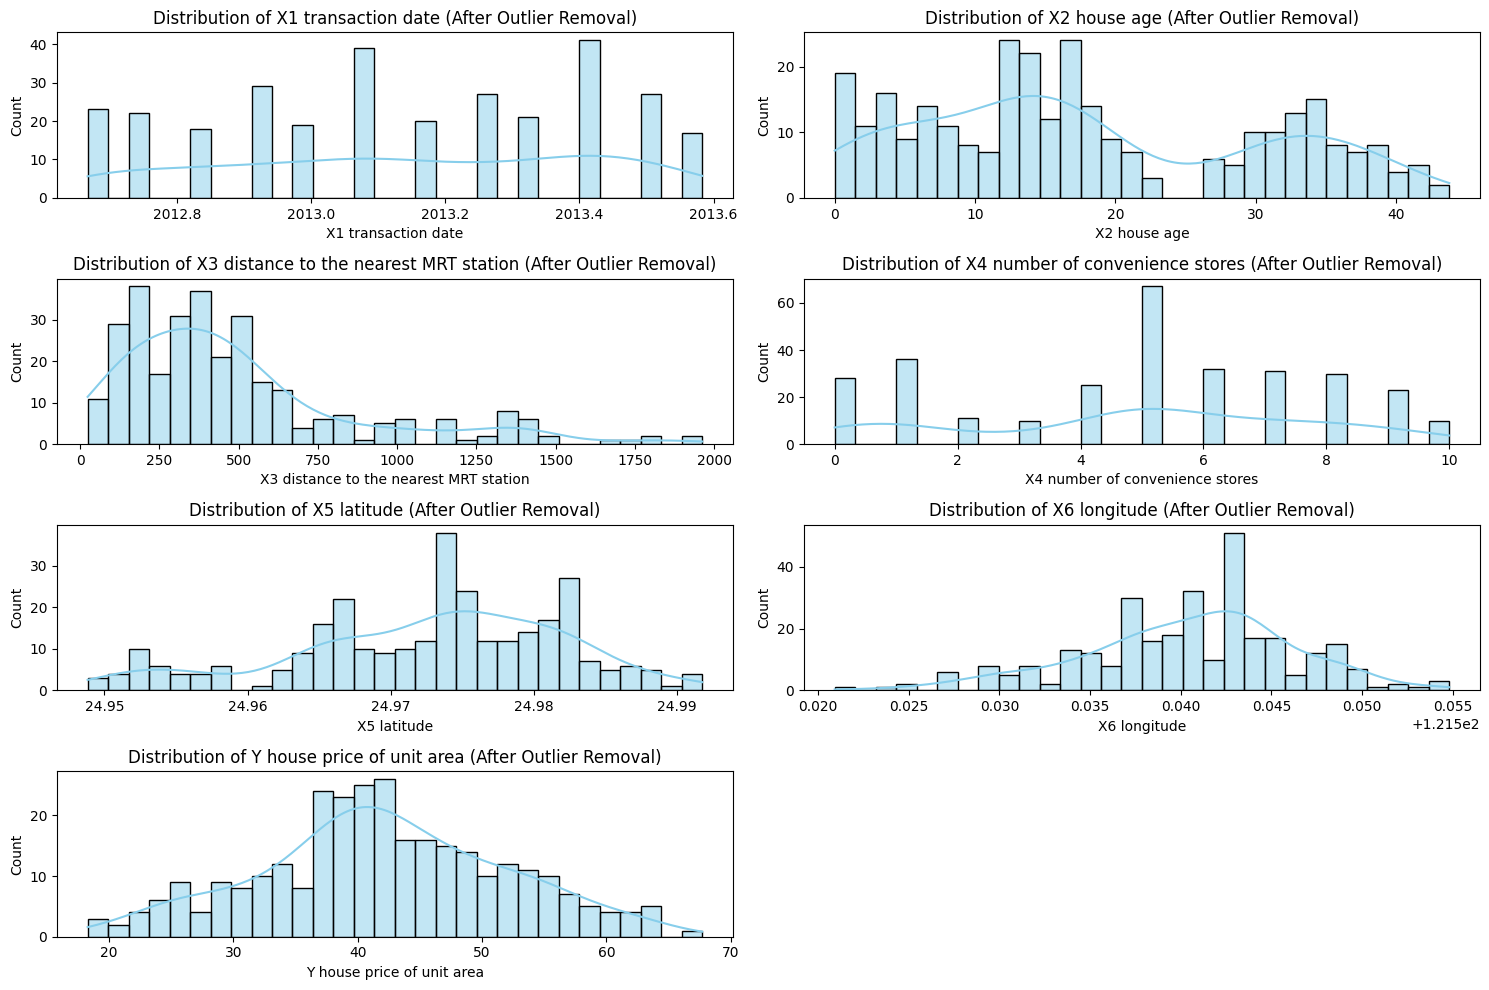

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV Files/Real estate.csv')

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numeric columns
for column in ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
               'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']:
    df = remove_outliers(df, column)

# Visualization using histograms with KDE after outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column} (After Outlier Removal)')
plt.tight_layout()
plt.show()